In [61]:
import os
import pandas as pd
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [62]:
# to check the working directory
os.getcwd()

'C:\\Users\\wajiz.pk\\Desktop\\ASSIGNMENT 3'

In [63]:
data = pd.read_csv('NYCAccidents2020.csv')
print(data.shape)
print(data.columns)

(74881, 29)
Index(['CRASH DATE', 'CRASH TIME', 'BOROUGH', 'ZIP CODE', 'LATITUDE',
       'LONGITUDE', 'LOCATION', 'ON STREET NAME', 'CROSS STREET NAME',
       'OFF STREET NAME', 'NUMBER OF PERSONS INJURED',
       'NUMBER OF PERSONS KILLED', 'NUMBER OF PEDESTRIANS INJURED',
       'NUMBER OF PEDESTRIANS KILLED', 'NUMBER OF CYCLIST INJURED',
       'NUMBER OF CYCLIST KILLED', 'NUMBER OF MOTORIST INJURED',
       'NUMBER OF MOTORIST KILLED', 'CONTRIBUTING FACTOR VEHICLE 1',
       'CONTRIBUTING FACTOR VEHICLE 2', 'CONTRIBUTING FACTOR VEHICLE 3',
       'CONTRIBUTING FACTOR VEHICLE 4', 'CONTRIBUTING FACTOR VEHICLE 5',
       'COLLISION_ID', 'VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2',
       'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4', 'VEHICLE TYPE CODE 5'],
      dtype='object')


In [64]:
missing = data.isnull().mean() * 100
print(missing)

CRASH DATE                        0.000000
CRASH TIME                        0.000000
BOROUGH                          34.375876
ZIP CODE                         34.383889
LATITUDE                          7.940599
LONGITUDE                         7.940599
LOCATION                          7.940599
ON STREET NAME                   25.957185
CROSS STREET NAME                52.349728
OFF STREET NAME                  74.042815
NUMBER OF PERSONS INJURED         0.000000
NUMBER OF PERSONS KILLED          0.000000
NUMBER OF PEDESTRIANS INJURED     0.000000
NUMBER OF PEDESTRIANS KILLED      0.000000
NUMBER OF CYCLIST INJURED         0.000000
NUMBER OF CYCLIST KILLED          0.000000
NUMBER OF MOTORIST INJURED        0.000000
NUMBER OF MOTORIST KILLED         0.000000
CONTRIBUTING FACTOR VEHICLE 1     0.405977
CONTRIBUTING FACTOR VEHICLE 2    20.827713
CONTRIBUTING FACTOR VEHICLE 3    90.965666
CONTRIBUTING FACTOR VEHICLE 4    97.528078
CONTRIBUTING FACTOR VEHICLE 5    99.301558
COLLISION_I

In [65]:
data.isnull().sum()

CRASH DATE                           0
CRASH TIME                           0
BOROUGH                          25741
ZIP CODE                         25747
LATITUDE                          5946
LONGITUDE                         5946
LOCATION                          5946
ON STREET NAME                   19437
CROSS STREET NAME                39200
OFF STREET NAME                  55444
NUMBER OF PERSONS INJURED            0
NUMBER OF PERSONS KILLED             0
NUMBER OF PEDESTRIANS INJURED        0
NUMBER OF PEDESTRIANS KILLED         0
NUMBER OF CYCLIST INJURED            0
NUMBER OF CYCLIST KILLED             0
NUMBER OF MOTORIST INJURED           0
NUMBER OF MOTORIST KILLED            0
CONTRIBUTING FACTOR VEHICLE 1      304
CONTRIBUTING FACTOR VEHICLE 2    15596
CONTRIBUTING FACTOR VEHICLE 3    68116
CONTRIBUTING FACTOR VEHICLE 4    73030
CONTRIBUTING FACTOR VEHICLE 5    74358
COLLISION_ID                         0
VEHICLE TYPE CODE 1                635
VEHICLE TYPE CODE 2      

<AxesSubplot:>

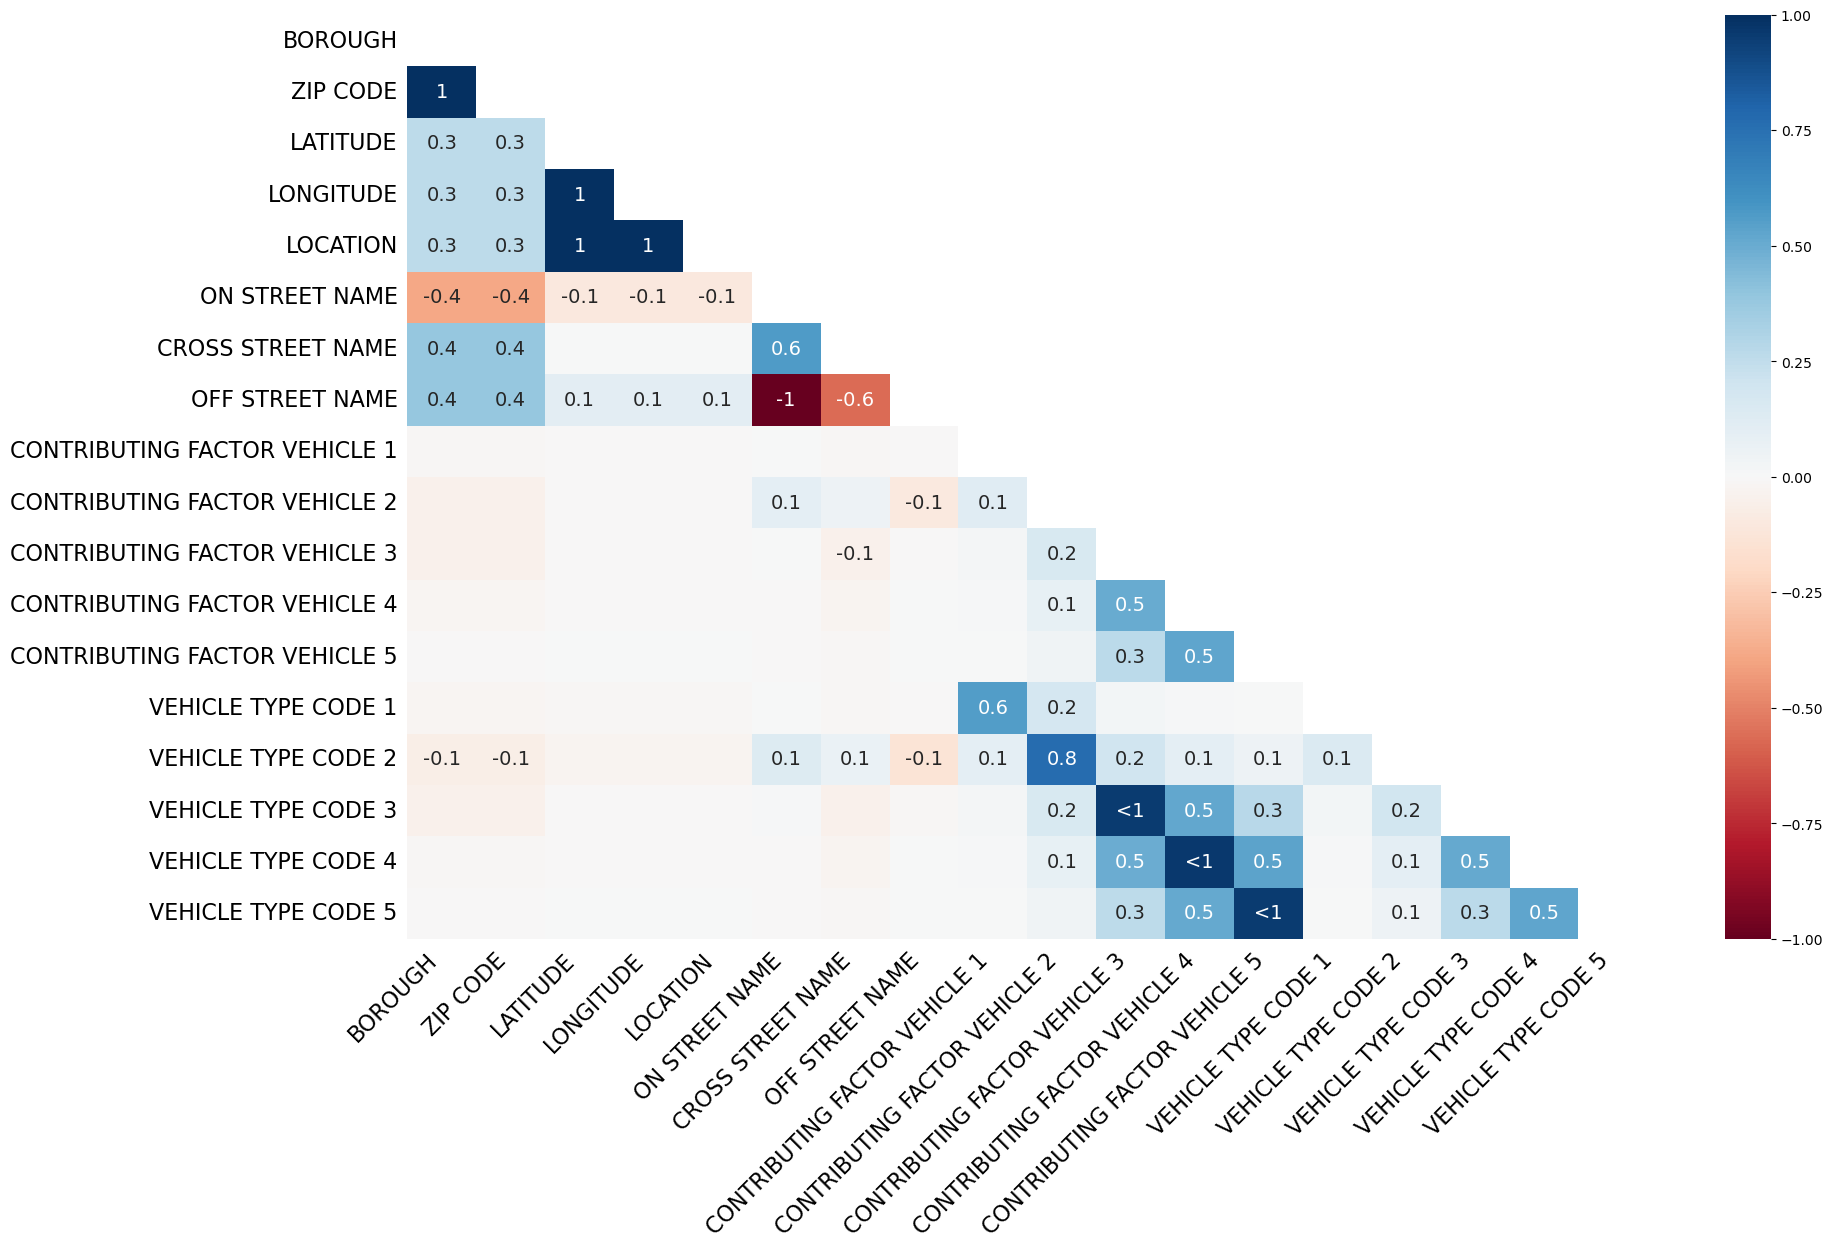

In [66]:
msno.heatmap(data)

In [67]:
cleanData = data.drop(columns=['OFF STREET NAME','CONTRIBUTING FACTOR VEHICLE 5','CONTRIBUTING FACTOR VEHICLE 4','CONTRIBUTING FACTOR VEHICLE 3','VEHICLE TYPE CODE 3','VEHICLE TYPE CODE 4','VEHICLE TYPE CODE 5'])

In [68]:
cleanData['BOROUGH'].mode()

0    BROOKLYN
Name: BOROUGH, dtype: object

In [69]:
cleanData['BOROUGH'].fillna('BROOKLYN',inplace=True)
cleanData.isnull().sum()

CRASH DATE                           0
CRASH TIME                           0
BOROUGH                              0
ZIP CODE                         25747
LATITUDE                          5946
LONGITUDE                         5946
LOCATION                          5946
ON STREET NAME                   19437
CROSS STREET NAME                39200
NUMBER OF PERSONS INJURED            0
NUMBER OF PERSONS KILLED             0
NUMBER OF PEDESTRIANS INJURED        0
NUMBER OF PEDESTRIANS KILLED         0
NUMBER OF CYCLIST INJURED            0
NUMBER OF CYCLIST KILLED             0
NUMBER OF MOTORIST INJURED           0
NUMBER OF MOTORIST KILLED            0
CONTRIBUTING FACTOR VEHICLE 1      304
CONTRIBUTING FACTOR VEHICLE 2    15596
COLLISION_ID                         0
VEHICLE TYPE CODE 1                635
VEHICLE TYPE CODE 2              21243
dtype: int64

In [70]:
cleanData.groupby('BOROUGH')['ZIP CODE'].apply(lambda x: x.isnull().sum())

BOROUGH
BRONX                0
BROOKLYN         25741
MANHATTAN            0
QUEENS               6
STATEN ISLAND        0
Name: ZIP CODE, dtype: int64

In [71]:
cleanData['ZIP CODE'].fillna(cleanData.groupby("BOROUGH")['ZIP CODE'].transform(lambda x: x.mode()[0]), inplace=True)

In [72]:
cleanData.isnull().sum()

CRASH DATE                           0
CRASH TIME                           0
BOROUGH                              0
ZIP CODE                             0
LATITUDE                          5946
LONGITUDE                         5946
LOCATION                          5946
ON STREET NAME                   19437
CROSS STREET NAME                39200
NUMBER OF PERSONS INJURED            0
NUMBER OF PERSONS KILLED             0
NUMBER OF PEDESTRIANS INJURED        0
NUMBER OF PEDESTRIANS KILLED         0
NUMBER OF CYCLIST INJURED            0
NUMBER OF CYCLIST KILLED             0
NUMBER OF MOTORIST INJURED           0
NUMBER OF MOTORIST KILLED            0
CONTRIBUTING FACTOR VEHICLE 1      304
CONTRIBUTING FACTOR VEHICLE 2    15596
COLLISION_ID                         0
VEHICLE TYPE CODE 1                635
VEHICLE TYPE CODE 2              21243
dtype: int64

In [73]:
columns_with_na = ['LATITUDE','LONGITUDE','LOCATION']
df = cleanData.dropna(axis=0, subset = columns_with_na)

In [74]:
df.isnull().sum()

CRASH DATE                           0
CRASH TIME                           0
BOROUGH                              0
ZIP CODE                             0
LATITUDE                             0
LONGITUDE                            0
LOCATION                             0
ON STREET NAME                   18860
CROSS STREET NAME                36040
NUMBER OF PERSONS INJURED            0
NUMBER OF PERSONS KILLED             0
NUMBER OF PEDESTRIANS INJURED        0
NUMBER OF PEDESTRIANS KILLED         0
NUMBER OF CYCLIST INJURED            0
NUMBER OF CYCLIST KILLED             0
NUMBER OF MOTORIST INJURED           0
NUMBER OF MOTORIST KILLED            0
CONTRIBUTING FACTOR VEHICLE 1      288
CONTRIBUTING FACTOR VEHICLE 2    14415
COLLISION_ID                         0
VEHICLE TYPE CODE 1                606
VEHICLE TYPE CODE 2              19779
dtype: int64

In [75]:
df = df.drop(columns=['CROSS STREET NAME'])

In [76]:
df['ON STREET NAME'].describe()

count            50075
unique            3415
top       BELT PARKWAY
freq              1118
Name: ON STREET NAME, dtype: object

In [77]:
df['ON STREET NAME'].mode()

0    BELT PARKWAY
Name: ON STREET NAME, dtype: object

In [78]:
df['ON STREET NAME'].fillna('BELT PARKWAY',inplace=True)
df.isnull().sum()

CRASH DATE                           0
CRASH TIME                           0
BOROUGH                              0
ZIP CODE                             0
LATITUDE                             0
LONGITUDE                            0
LOCATION                             0
ON STREET NAME                       0
NUMBER OF PERSONS INJURED            0
NUMBER OF PERSONS KILLED             0
NUMBER OF PEDESTRIANS INJURED        0
NUMBER OF PEDESTRIANS KILLED         0
NUMBER OF CYCLIST INJURED            0
NUMBER OF CYCLIST KILLED             0
NUMBER OF MOTORIST INJURED           0
NUMBER OF MOTORIST KILLED            0
CONTRIBUTING FACTOR VEHICLE 1      288
CONTRIBUTING FACTOR VEHICLE 2    14415
COLLISION_ID                         0
VEHICLE TYPE CODE 1                606
VEHICLE TYPE CODE 2              19779
dtype: int64

In [79]:
df['CONTRIBUTING FACTOR VEHICLE 1'].mode()

0    Unspecified
Name: CONTRIBUTING FACTOR VEHICLE 1, dtype: object

In [80]:
df['CONTRIBUTING FACTOR VEHICLE 1'].fillna('Unspecified',inplace=True)
df.isnull().sum()

CRASH DATE                           0
CRASH TIME                           0
BOROUGH                              0
ZIP CODE                             0
LATITUDE                             0
LONGITUDE                            0
LOCATION                             0
ON STREET NAME                       0
NUMBER OF PERSONS INJURED            0
NUMBER OF PERSONS KILLED             0
NUMBER OF PEDESTRIANS INJURED        0
NUMBER OF PEDESTRIANS KILLED         0
NUMBER OF CYCLIST INJURED            0
NUMBER OF CYCLIST KILLED             0
NUMBER OF MOTORIST INJURED           0
NUMBER OF MOTORIST KILLED            0
CONTRIBUTING FACTOR VEHICLE 1        0
CONTRIBUTING FACTOR VEHICLE 2    14415
COLLISION_ID                         0
VEHICLE TYPE CODE 1                606
VEHICLE TYPE CODE 2              19779
dtype: int64

In [81]:
df.groupby('CONTRIBUTING FACTOR VEHICLE 1')['CONTRIBUTING FACTOR VEHICLE 2'].apply(lambda x: x.isnull().sum())

CONTRIBUTING FACTOR VEHICLE 1
Accelerator Defective                                       9
Aggressive Driving/Road Rage                               66
Alcohol Involvement                                       118
Animals Action                                             30
Backing Unsafely                                          274
Brakes Defective                                           40
Cell Phone (hand-Held)                                      6
Cell Phone (hands-free)                                     1
Driver Inattention/Distraction                           1806
Driver Inexperience                                       178
Driverless/Runaway Vehicle                                 11
Drugs (illegal)                                            17
Eating or Drinking                                          1
Failure to Keep Right                                       4
Failure to Yield Right-of-Way                             862
Fatigued/Drowsy                         

In [82]:
df['CONTRIBUTING FACTOR VEHICLE 2'] = df['CONTRIBUTING FACTOR VEHICLE 2'].fillna(df['CONTRIBUTING FACTOR VEHICLE 1'])

In [83]:
df.isnull().sum()


CRASH DATE                           0
CRASH TIME                           0
BOROUGH                              0
ZIP CODE                             0
LATITUDE                             0
LONGITUDE                            0
LOCATION                             0
ON STREET NAME                       0
NUMBER OF PERSONS INJURED            0
NUMBER OF PERSONS KILLED             0
NUMBER OF PEDESTRIANS INJURED        0
NUMBER OF PEDESTRIANS KILLED         0
NUMBER OF CYCLIST INJURED            0
NUMBER OF CYCLIST KILLED             0
NUMBER OF MOTORIST INJURED           0
NUMBER OF MOTORIST KILLED            0
CONTRIBUTING FACTOR VEHICLE 1        0
CONTRIBUTING FACTOR VEHICLE 2        0
COLLISION_ID                         0
VEHICLE TYPE CODE 1                606
VEHICLE TYPE CODE 2              19779
dtype: int64

In [84]:
df['VEHICLE TYPE CODE 1'].mode()

0    Sedan
Name: VEHICLE TYPE CODE 1, dtype: object

In [85]:
df['VEHICLE TYPE CODE 1'].fillna('Sedan',inplace=True)
df.isnull().sum()

CRASH DATE                           0
CRASH TIME                           0
BOROUGH                              0
ZIP CODE                             0
LATITUDE                             0
LONGITUDE                            0
LOCATION                             0
ON STREET NAME                       0
NUMBER OF PERSONS INJURED            0
NUMBER OF PERSONS KILLED             0
NUMBER OF PEDESTRIANS INJURED        0
NUMBER OF PEDESTRIANS KILLED         0
NUMBER OF CYCLIST INJURED            0
NUMBER OF CYCLIST KILLED             0
NUMBER OF MOTORIST INJURED           0
NUMBER OF MOTORIST KILLED            0
CONTRIBUTING FACTOR VEHICLE 1        0
CONTRIBUTING FACTOR VEHICLE 2        0
COLLISION_ID                         0
VEHICLE TYPE CODE 1                  0
VEHICLE TYPE CODE 2              19779
dtype: int64

In [88]:
def replacezeros(df, col_name):
    if df[df[col_name] == 0.0].shape[0] > 0:
        df[col_name] = df[col_name].replace(0, np.nan)
        return True
    else:
        return False

In [89]:
replacezeros(df, 'VEHICLE TYPE CODE 2')

False

In [86]:
df.groupby('VEHICLE TYPE CODE 1')['VEHICLE TYPE CODE 2'].apply(lambda x: x.isnull().sum())

VEHICLE TYPE CODE 1
0              1
18 WHEELER     0
2 dr sedan     1
3-Door         1
4 dr sedan    41
              ..
tractor tr     0
truck          0
usps           0
van            3
yellow cab     0
Name: VEHICLE TYPE CODE 2, Length: 256, dtype: int64

In [90]:
df['VEHICLE TYPE CODE 2'] = df['VEHICLE TYPE CODE 2'].fillna(df['VEHICLE TYPE CODE 1'])

In [91]:
df.isnull().sum()

CRASH DATE                       0
CRASH TIME                       0
BOROUGH                          0
ZIP CODE                         0
LATITUDE                         0
LONGITUDE                        0
LOCATION                         0
ON STREET NAME                   0
NUMBER OF PERSONS INJURED        0
NUMBER OF PERSONS KILLED         0
NUMBER OF PEDESTRIANS INJURED    0
NUMBER OF PEDESTRIANS KILLED     0
NUMBER OF CYCLIST INJURED        0
NUMBER OF CYCLIST KILLED         0
NUMBER OF MOTORIST INJURED       0
NUMBER OF MOTORIST KILLED        0
CONTRIBUTING FACTOR VEHICLE 1    0
CONTRIBUTING FACTOR VEHICLE 2    0
COLLISION_ID                     0
VEHICLE TYPE CODE 1              0
VEHICLE TYPE CODE 2              0
dtype: int64

In [92]:
with pd.ExcelWriter('KHANSA JUNAID_23074_SUMAIR KHANANI_22995_CLEANDATA2.xlsx') as writer:
    df.to_excel(writer, sheet_name='Sheet1', index=False)